In [29]:
import base64
import io
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import sqlite3 as sl 

In [34]:
con = sl.connect('crypto.db')
names = []
values = []
currency = 'Bitcoin'
with con:
    ds = con.execute(f"SELECT name, price, volume_24h, timestamp FROM cryptocurrency WHERE name = '{currency}'")
    for row in ds:
      # json_dict = {'id': row[0], 'name': row[1], 'price': row[2], 'timestamp': row[3]}
      names.append(row[3])
      values.append(row[1])
      # print(row)
    
    print('Names: ')
    print(names)

    print('Values: ')
    print(values)

Names: 
['2021-04-15T23:23:02.000Z', '2021-04-15T23:23:02.000Z', '2021-05-26T02:48:02.000Z', '2021-05-26T16:00:02.000Z']
Values: 
[76166.87047596426, 76166.87047596426, 39211.76061281707, 38802.61406825654]


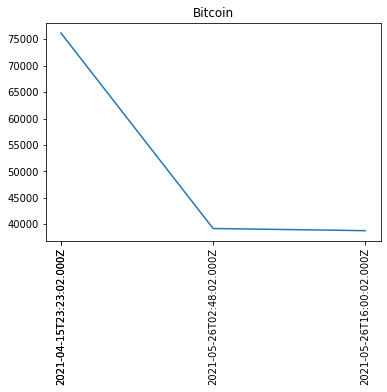

In [35]:
# With pyplot so we can see it here
plt.figure()
plt.plot(names, values)
plt.title(currency)
plt.xticks(names, names, rotation='vertical')
buf = io.BytesIO()
plt.savefig(buf, format='png')
data = base64.b64encode(buf.getbuffer()).decode("ascii")
# print(f"<img src='data:image/png;base64,{data}'/>")
plt.show()


<ipython-input-39-1a395f082d20>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)

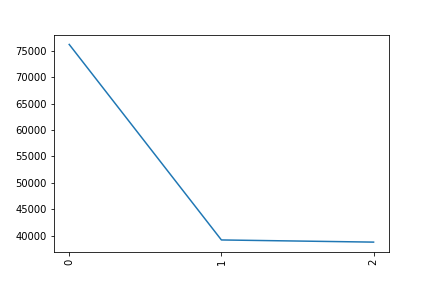

In [39]:


fig = Figure()
ax = fig.subplots()
ax.plot(names, values)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
buf = io.BytesIO()
fig.savefig(buf, format='png')
data = base64.b64encode(buf.getbuffer()).decode("ascii")
print(f"<img src='data:image/png;base64,{data}'/>")
